<h1><center>Laboratorio 10: Interpretabilidad 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Ignacio Meza, Sebastian Tinoco
- Auxiliar: Catherine Benavides, Consuelo Rojas
- Ayudante: Eduardo Moya, Nicolás Ojeda

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Melanie Peña Torres
- Nombre de alumno 2: Valentina Rojas Osorio


### **Link de repositorio de GitHub:** `http://....`

### Indice

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificación usando `XGBoost`.
- Métodos Agnósticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- Métodos Agnósticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Generar un pipeline de clasificación con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificación.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# 1. Problemas Clínicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('diabetes_data.csv')
df.head(10)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,1.0,18.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0
6,13.0,1.0,1.0,1.0,26.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,6.0,1.0,0.0,1.0,31.0,1.0,0.0,0.0,1.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
8,3.0,0.0,0.0,1.0,32.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
9,6.0,1.0,0.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,6.0,0.0,0.0,0.0,0.0


## 2. Clasificación de pacientes con diabetes (0.5 puntos)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

Tareas:
1. En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento tome en cuenta **todos** los pasos necesarios para entrenar un modelo de aprendizaje supervisado vistos hasta la fecha (use `Pipeline`, `ColumnTransformer`, etc.). Comente sus decisiones y los resultados obtenidos con el modelo. ✅

2. Luego, le pide responder las siguientes preguntas:
  *  ¿Es acaso un buen predictor de diabetes? ✅
  * ¿Qué buscan explicar las métricas utilizadas? ✅
  * ¿Las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?✅

In [2]:
!pip install xgboost

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [4]:
for column_name in df.columns:
  unique_values = df[column_name].unique()
  print(f'Esta columna {column_name} tiene estos valores únicos {unique_values}')

Esta columna Age tiene estos valores únicos [ 4. 12. 13. 11.  8.  1.  6.  3.  7. 10.  9.  5.  2.]
Esta columna Sex tiene estos valores únicos [1. 0.]
Esta columna HighChol tiene estos valores únicos [0. 1.]
Esta columna CholCheck tiene estos valores únicos [1. 0.]
Esta columna BMI tiene estos valores únicos [26. 28. 29. 18. 31. 32. 27. 24. 21. 58. 30. 20. 22. 38. 40. 25. 36. 47.
 19. 37. 41. 23. 34. 35. 42. 17. 33. 44. 15. 52. 69. 56. 45. 39. 92. 53.
 98. 50. 46. 79. 48. 16. 63. 72. 54. 49. 68. 43. 84. 73. 76. 55. 51. 75.
 57. 60. 12. 77. 82. 67. 71. 61. 14. 81. 59. 86. 13. 87. 65. 95. 89. 62.
 64. 66. 85. 70. 83. 80. 78. 74.]
Esta columna Smoker tiene estos valores únicos [0. 1.]
Esta columna HeartDiseaseorAttack tiene estos valores únicos [0. 1.]
Esta columna PhysActivity tiene estos valores únicos [1. 0.]
Esta columna Fruits tiene estos valores únicos [0. 1.]
Esta columna Veggies tiene estos valores únicos [1. 0.]
Esta columna HvyAlcoholConsump tiene estos valores únicos [0. 1.]
Est

Como podemos ver de un análisis rápido anterior, todas las variables son números. Consideraremos ordinales aquellas variables que posean un 'ranking' como GenHlth, MentHlth y PhysHlth. Las variables como Age y BMI son numéricas por naturaleza. Las demás las consideraremos como categóricas por sus obvios valores de 0 y 1 (clasificación binaria).

In [5]:
# Librerías

import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, mean_absolute_error, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Modelo y resultados

# División de los datos para el modelo
# 'Diabetes' es el target!

X = df.drop('Diabetes', axis=1)
y = df['Diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Variables importantes de procesar que mencionamos anteriormente

numeric_var = ['Age', 'BMI']
ordinal_var = ['GenHlth', 'MentHlth', 'PhysHlth']

# Preprocesamiento y Pipeline!

preprocesamiento = ColumnTransformer(
    transformers=[
        ('procesamiento_numericas', StandardScaler(), numeric_var),
        ('procesamiento_ordinales', OrdinalEncoder(), ordinal_var)],
    remainder="passthrough", # dejamos pasar las otras columnas dado que ya son categóricas
)

preprocesamiento.set_output(transform='pandas')

pipeline = Pipeline(steps=[
    ('preprocessor', preprocesamiento),
    ('classifier', XGBClassifier(random_state=42))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [7]:
# Classification report
print('Classification report for the XGB model')
print(classification_report(y_test, y_pred))

Classification report for the XGB model
              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74      7090
         1.0       0.73      0.79      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



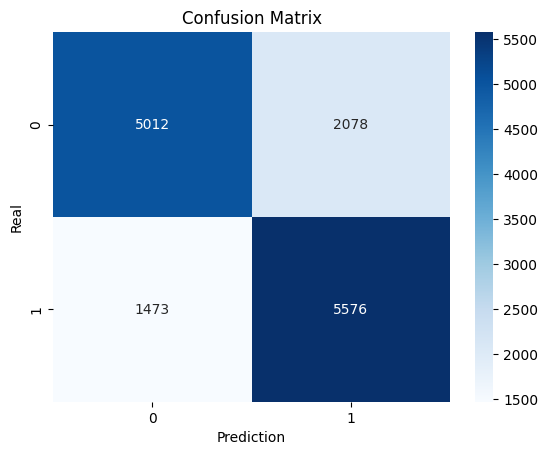

In [8]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prediction')
plt.ylabel('Real')
plt.title('Confusion Matrix')
plt.show()

Podemos verificar a simple vista de los resultados que el modelo corresponde a un buen clasificador. Si consideramos un umbral de "buenas clasificaciones" como tener un 70% de los datos con buenas métricas, esto se puede verificar a través del classification report del modelo.

Vamos a explicar las métricas utilizadas en el classification report:

Precision : Representa la proporción de verdaderos positivos (diagnósticos correctos de diabetes) entre el total de positivos predichos por el modelo. En este caso, la precisión es del 77% para la clase 0 'no diabetes' y del 73% para la clase 1 'diabetes'. Esto significa que el 77% de las veces que el modelo predice 'no diabetes', acierta, y el 73% de las veces que predice 'diabetes', acierta.

Recall : Representa la proporción de verdaderos positivos (diagnósticos correctos de diabetes) entre todos los positivos reales. En este caso, el recall es del 71% para la clase 0 'no diabetes' y del 79% para la clase 1 'diabetes'. Esto indica que el modelo identifica el 71% de los casos reales de 'no diabetes' y el 79% de los casos reales de 'diabetes'.

F1-score: Representa una medida ponderada entre el precisión y recall. Cuanto más cercano a 1 sea el valor, mejor es la clasificación. En este caso, el F1-score es 0.74 para la clase 0 'no diabetes' y 0.76 para la clase 1 'diabetes'.

Accuracy : Representa la proporción de predicciones correctas en general. En este caso, la exactitud del modelo es del 75%, lo que significa que el 75% de todas las predicciones son correctas.

También utilizamos una matriz de confusión para visualizar cómo son las predicciones del modelo. En este caso, se observa que el modelo tiene un número mayor de falsos positivos (2078) que de falsos negativos (1473).

No necesariamente estas métricas nos aseguran que el modelo esté utilizando las características (features) apropiadas. Dado que, como vimos, estas métricas llegan aproximadamente al 70% de buenas clasificaciones, es posible mejorarlas. Podríamos verificar también la matriz de correlación entre las características para ver cuáles son más relevantes con el objetivo designado.

## 3. Importancia de las features con XGBoost (0.5 puntos)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Tareas:
1. Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`. ✅
2. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. ✅
3. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método? ✅

In [9]:
# Librerías

from xgboost import plot_importance

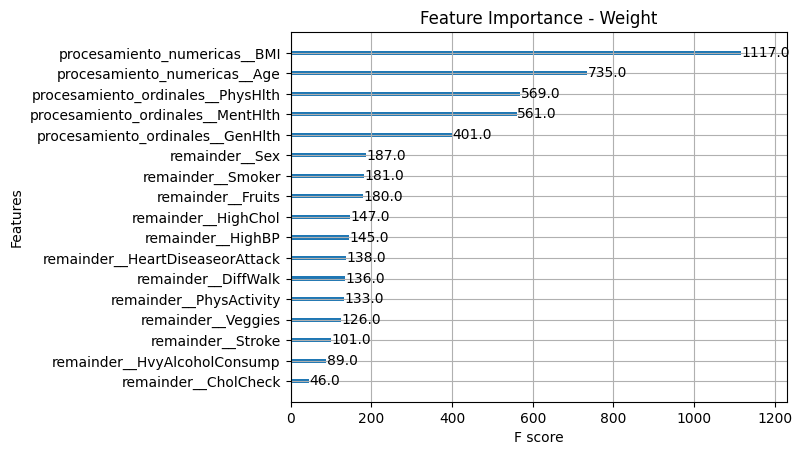

In [10]:
# Importancia de los features - Weight
plot_importance(pipeline.named_steps['classifier'], importance_type='weight')
plt.title('Feature Importance - Weight')
plt.show()

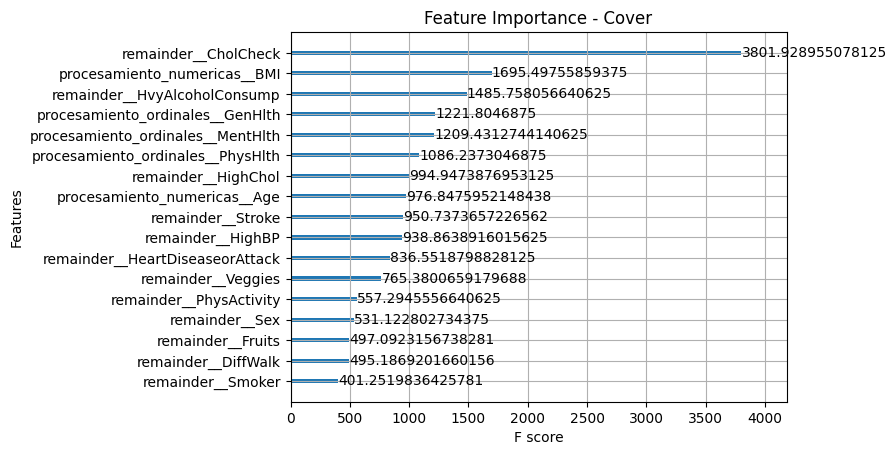

In [11]:
# Importancia de los features - Cover
plot_importance(pipeline.named_steps['classifier'], importance_type='cover')
plt.title('Feature Importance - Cover')
plt.show()

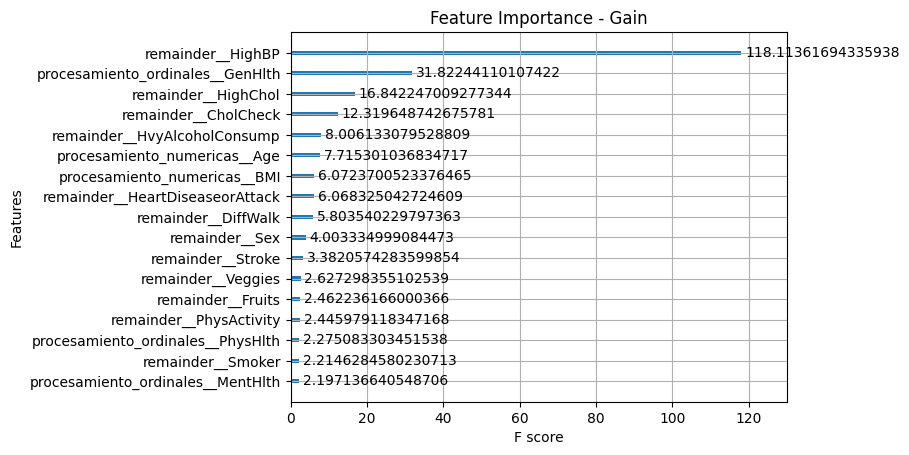

In [12]:
# Importancia de los features - Gain
plot_importance(pipeline.named_steps['classifier'], importance_type='gain')
plt.title('Feature Importance - Gain')
plt.show()

No necesariamente los resultados de los métodos empleados serán compatibles, esto se debe a las diferentes formas en que se calcula la importancia de los features con los distintos métodos. Por ejemplo, Weight mide la frecuencia de uso, Cover mide la cantidad de datos afectados, y Gain mide la mejora en la precisión.

Por ejemplo, una característica puede tener un alto Weight porque se usa mucho, como Age y BMI, pero si no mejora mucho la precisión, tendrá un bajo Gain, lo que se puede verificar en el gráfico donde su importancia disminuyó considerablemente, pasando de 1117 para Age y 735 para BMI, a 7.7 para Age y 6.07 para BMI.

Si bien las importancias graficadas nos proporcionan cierta interpretabilidad, no son suficientes por sí solas. La interpretabilidad de un modelo depende de varios factores, incluida la complejidad del modelo, la calidad de los datos, la regularización aplicada y la capacidad del modelo para capturar relaciones complejas, cosas que no podemos asegurar netamente con estos cálculos dado que no nos proporcionan una imagen completa de como interactúan los features entre sí, como podría ser una visualización del árbol empleado.

## 4. Métodos Agnósticos Globales (1.0 puntos)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Tareas:
1. Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features. ✅
2. Visualice los resultados de este método en un gráfico. ✅
3. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala está?). ✅
4. Además, responda las siguientes preguntas:
  - ¿Cómo mide la importancia de las features su propuesta? ✅
  - ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿tienen sentido? ✅
  - ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior? ✅
  - Nombre y explique 3 ventajas y 3 desventajas del método implementado. ✅

In [13]:
# Librerías

from sklearn.inspection import permutation_importance
import numpy as np

In [14]:
# Inserte su código aquí

result = permutation_importance(pipeline, X_test, y_test, n_repeats=30, random_state=42)

In [18]:
result

{'importances_mean': array([0.02764693, 0.00285027, 0.01130679, 0.00375085, 0.03305986,
        0.00075441, 0.00426008, 0.00077563, 0.00013674, 0.0006554 ,
        0.00434496, 0.05654101, 0.00163142, 0.00072377, 0.00369192,
        0.0015937 , 0.0157319 ]),
 'importances_std': array([0.0021241 , 0.00115049, 0.00156482, 0.00052973, 0.00218419,
        0.00056679, 0.00080717, 0.00060332, 0.00079242, 0.00077325,
        0.00077103, 0.00276211, 0.00109811, 0.00139095, 0.00100195,
        0.0006267 , 0.00143055]),
 'importances': array([[ 3.11195983e-02,  2.70881958e-02,  2.59565740e-02,
          2.68760167e-02,  3.11195983e-02,  3.16854092e-02,
          2.77247330e-02,  2.71589221e-02,  2.87856284e-02,
          2.48956786e-02,  2.82905439e-02,  2.39055096e-02,
          2.83612702e-02,  2.58858477e-02,  2.68760167e-02,
          2.92099866e-02,  2.98465238e-02,  2.60980267e-02,
          2.44005941e-02,  2.96343447e-02,  2.71589221e-02,
          2.43298677e-02,  2.77247330e-02,  3.0553

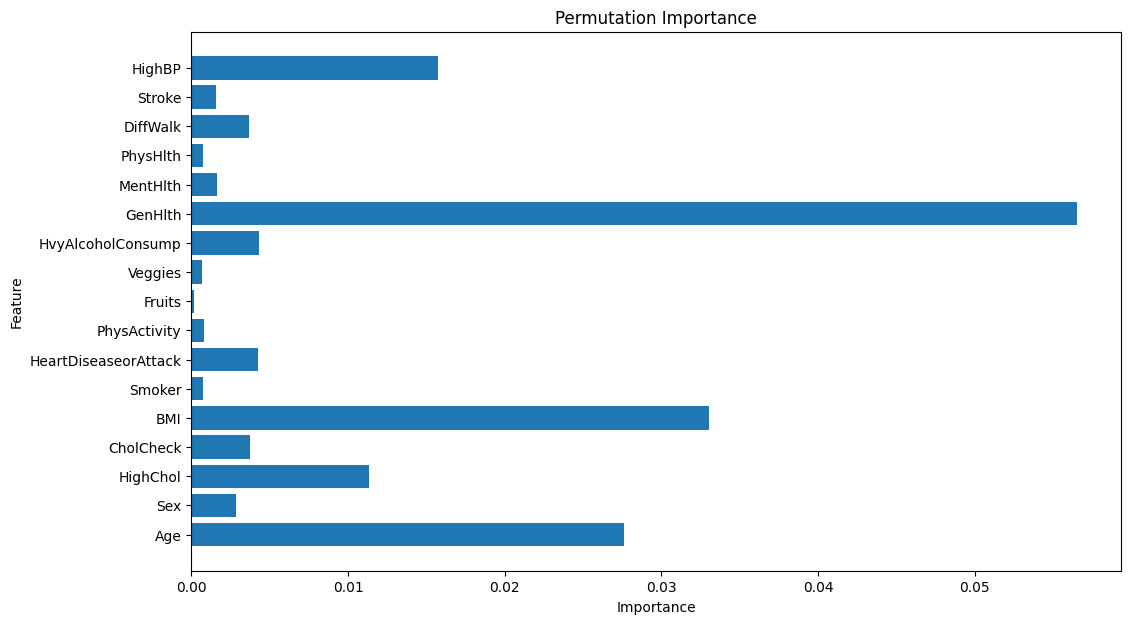

In [22]:
# Visualización

importances = result.importances_mean
feature_names = X.columns

plt.figure(figsize=(12, 7))
plt.barh(feature_names, importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Permutation Importance')
plt.show()

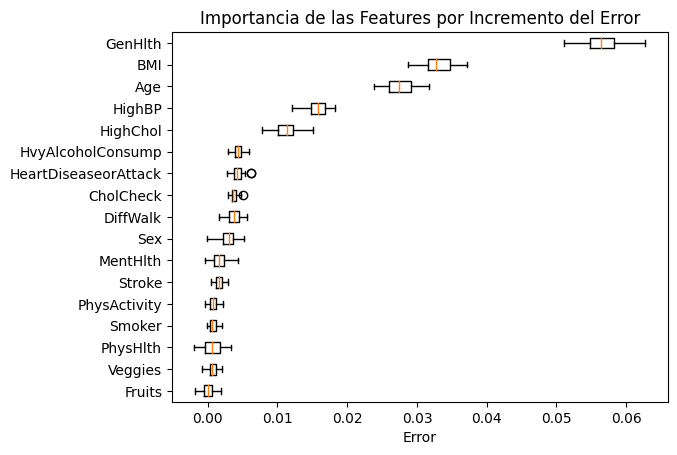

In [29]:
perm_sorted_idx = result.importances_mean.argsort()
plt.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
    labels=np.array(X_test.columns.to_list())[perm_sorted_idx],
)
plt.title("Importancia de las Features por Incremento del Error")
plt.xlabel('Error')
plt.show()

In [31]:
# Desviación estándar
std = result.importances_std
std

array([0.0021241 , 0.00115049, 0.00156482, 0.00052973, 0.00218419,
       0.00056679, 0.00080717, 0.00060332, 0.00079242, 0.00077325,
       0.00077103, 0.00276211, 0.00109811, 0.00139095, 0.00100195,
       0.0006267 , 0.00143055])

La desviación estándar representa la variabilidad de las importancias de los features obtenidas en las 30 repeticiones. Las desviaciones estándar tienen valores muy bajos, indicando poca variabilidad y gran consistencia en los resultados.

El método empleado mide la importancia por medio de dos valores de error, uno asociado al modelo original con respecto a su predicción, y el segundo asociado a las predicciones del conjunto de datos permutado.

Las features de mayor importancia son:

1. GenHlth: Representa la salud general percibida por el paciente. Aunque es subjetiva, parece acertada dada su relevancia.
2. BMI: Índice de masa corporal, importante debido a su relación con el riesgo de diabetes.
3. Age: La edad es un indicativo clásico de diabetes (como la mia).
4. HighBP: Indica si el paciente tiene presión arterial alta, relacionada con la diabetes.
5. HighChol: Similar a HighBP, pero referida al colesterol, también relacionado con la diabetes.

Todas las características obtenidas tienen sentido al estar relacionadas con causas vinculadas a la presencia de la diabetes, que son de conocimiento común. Sin embargo, estimamos que la primera feature (GenHlth) es la más cuestionable, ya que se basa en la percepción subjetiva de la salud del paciente, lo que puede estar sesgado por sus propias percepciones.

Nuestras conclusiones difieren en comparación con el punto anterior. Aunque ciertas características son compartidas entre los diferentes métodos, no todas coinciden. Por ejemplo, el método Cover destaca la importancia de CholCheck, pero ahora ni siquiera esta dentro de las cinco primeras. Similarmente, BMI y Age, que tienen una baja importancia según el método Gain, ahora muestran cierto nivel de relevancia al ocupar los puestos 2 y 3 respectivamente.

Este metodo posee las siguientes ventajas:

- Fácil interpretación: Informacion sencilla de interpretar, calcula errores con metricas conocidas.
- Alta compresión de interpretabilidad global: Manteniene el nombre de las variables, hace comparacion con ellas.
- Comparable con diferentes modelos: Tal como el analisis anterior, basicamente no genera una metrica nueva relacionada al total del conjunto de variables.

Pero tambien posee las siguientes desventajas:

- Enlazado al error del modelo: Si el modelo es malo, la importanica genera calculos sin sentido a causa del error_modelo.
- Necesita acceso a la gold label: Utiliza la data de la variable objetivo, lo cual es una desventaja debido a que se requiere la data etiquetada. Basicamente, es una desventaja por que existen otros metodos que no ocupan esa informacion.
- Si las features están correlacionadas puede generar sesgos por entradas poco realistas: Esto se genera por la permutaciones entre caracteristicas y el error calculado por permutacion.

## 5. Métodos Agnósticos Locales (2.0 puntos)

<p align="center">
  <img src="https://i.makeagif.com/media/1-27-2017/fBrzT8.mp4" width="400">
</p>

### 5.1 Calculando Shap Values (0.4 puntos)

Tareas:
1. Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo. ✅
2. ¿Qué representa cada número en su resultado? ✅
3. ¿Es posible atribuir un significado a la positividad/negatividad de cada valor?  ✅

In [32]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 3.7 MB/s eta 0:00:00


In [40]:
# Librería

import shap

In [33]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

In [46]:
# Inserte código para calcular shapley values aquí

explainer = shap.TreeExplainer(pipeline.named_steps['classifier'])
shap_values = explainer(X_test)

In [47]:
shap_values.values

array([[ 0.6493716 ,  0.2903505 , -0.39694226, ..., -0.13052656,
        -0.04460565, -0.43071923],
       [ 0.68367684,  0.38909295, -0.735816  , ...,  0.71651477,
        -0.01485502, -0.26804295],
       [ 0.29687738,  0.29144835, -0.43610424, ..., -0.11474369,
        -0.01715365,  0.27082348],
       ...,
       [ 0.7982932 ,  1.1781828 , -0.59663504, ...,  0.8279175 ,
        -0.0151974 , -0.40635246],
       [ 0.28421313,  0.08005994, -0.30272728, ..., -0.11754208,
        -0.02150351,  0.37733868],
       [ 0.7517468 ,  0.62952554, -0.6464129 , ...,  0.3339337 ,
        -0.02201967, -0.44108316]], dtype=float32)

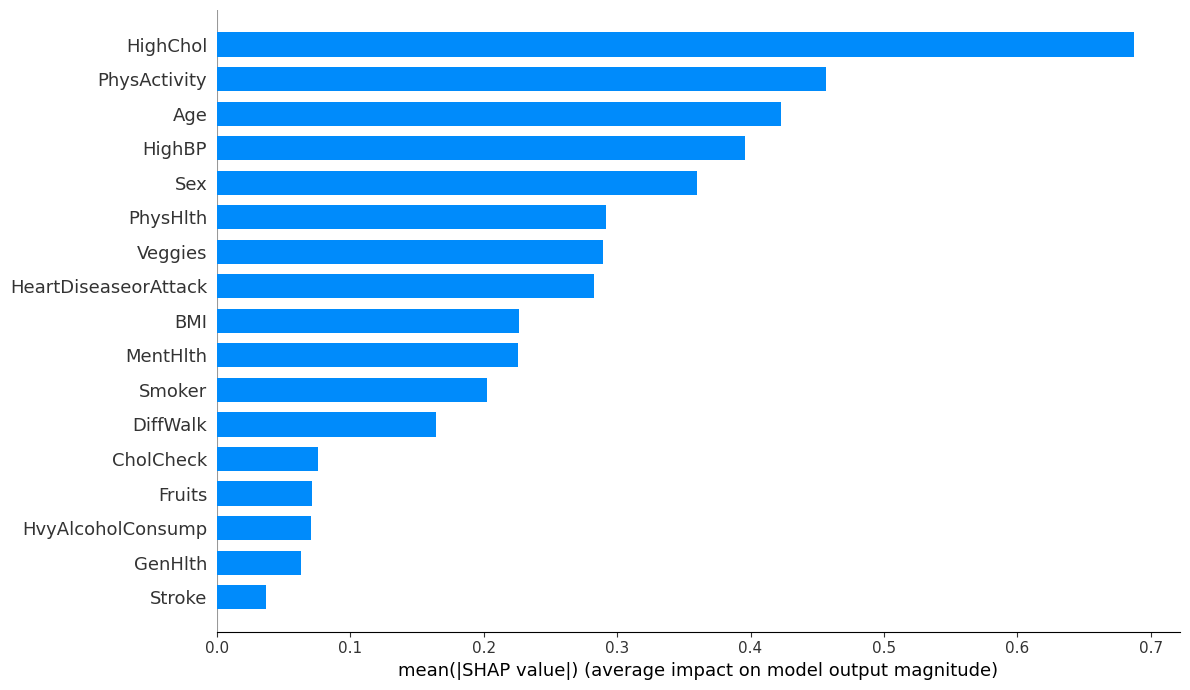

In [37]:
shap.summary_plot(shap_values, X_test, plot_type='bar', plot_size=(12, 7))
plt.show()

Los SHAP values nos permiten entender cómo cada característica contribuye individualmente a la predicción del modelo para un paciente específico en comparación con la predicción promedio que entrega el modelo.

Cada número en los SHAP values representa el impacto que tiene una característica específica en la predicción del modelo para un caso particular. Un SHAP value positivo indica que esa característica contribuyó a aumentar la predicción del modelo, mientras que un SHAP value negativo indica que contribuyó a disminuir la predicción.




### 5.2 Aporte local (0.4 puntos)


1. Usando los *shap values* calculados, grafique el **aporte** de las diferentes variables para las instancias **1**, **9** y **150**, interprete sus resultados y responda:

  - ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes? ✅

  - ¿Existe algún patrón común entre las instancias analizadas? ✅

  - ¿Es posible generalizar estas conclusiones a todo el dataset? ✅

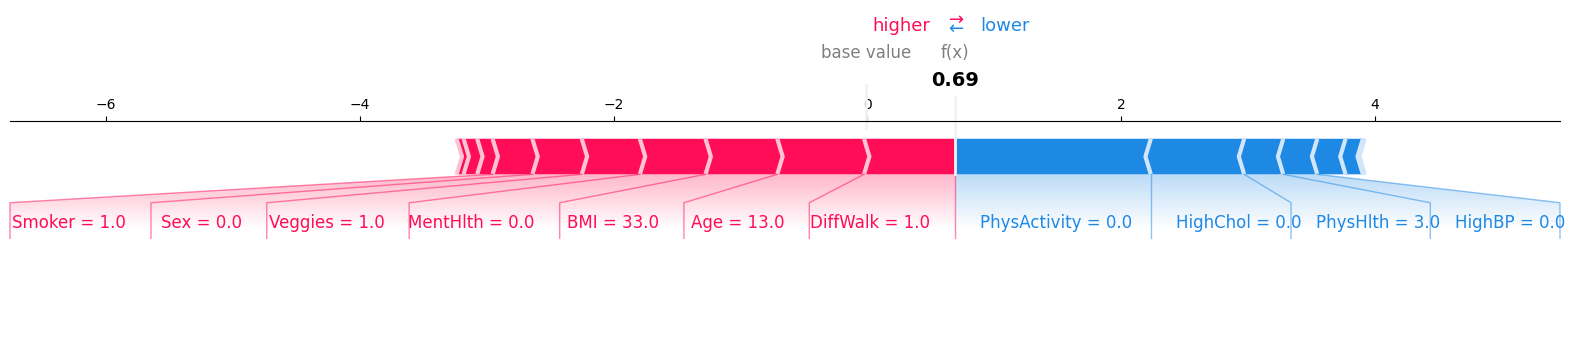

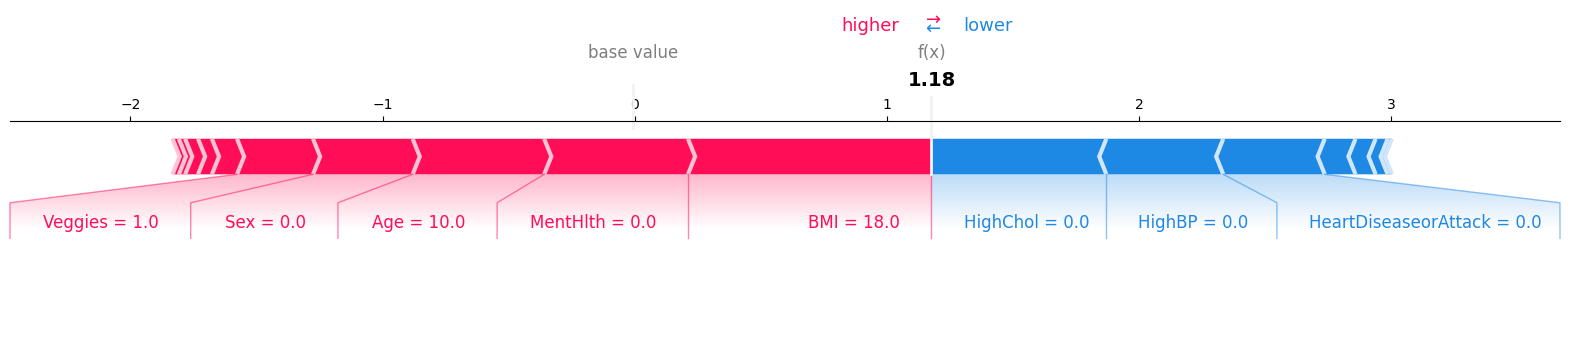

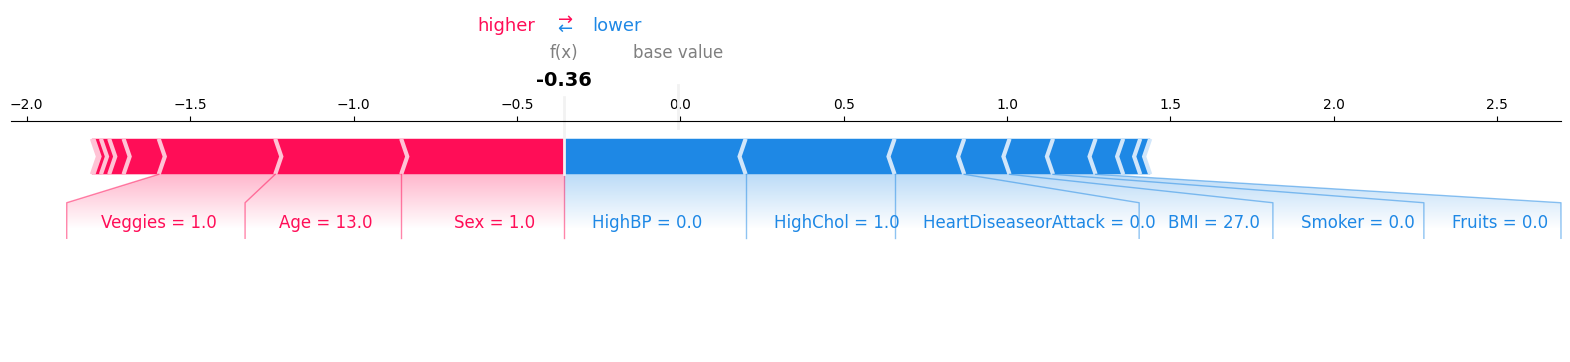

In [48]:
# Inserte código para generar gráficos de aporte local aquí

shap.initjs()

idx = [1, 9, 150]

for instance in idx:
    shap.force_plot(explainer.expected_value,
                shap_values.values[instance,:],
                X_test.iloc[instance,:],
                matplotlib=True )

Variables de impacto positivo :  
* Smoker
* Sex
* Veggies
* Age
* MentHlth
* BMI
* DiffWalk

Variables de impacto negativo:

* HighBP
* HighChol
* HeartDiseaseorAttack
* BMI
* Smoker
* Fruits
* PhysActivity
* PhysHlth

Sin embargo, estas relaciones no son consistentes en todos los casos. Por ejemplo, en una instancia específica, BMI puede tener un impacto positivo, mientras que en otra instancia tiene un impacto negativo. Esto nos indica que la influencia de las variables puede variar según el contexto en el que revisen, en este caso, los índices.

Por último, es importante destacar que estas instancias individuales no definen un patrón general para todos los datos. Aunque algunas variables pueden tener un peso significativo, los valores SHAP representan promedios y no se aplican de manera específica a cada caso. Por lo tanto, se debe interpretar con cautela y considerar el contexto de cada predicción.

Finalmente, concluimos que las conclusiones obtenidas (xd) no se pueden generalizar al dataset completo debido a la variabilidad en el impacto de las variables en diferentes instancias (índices)

### 5.3 Aporte global (0.4 puntos)

Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

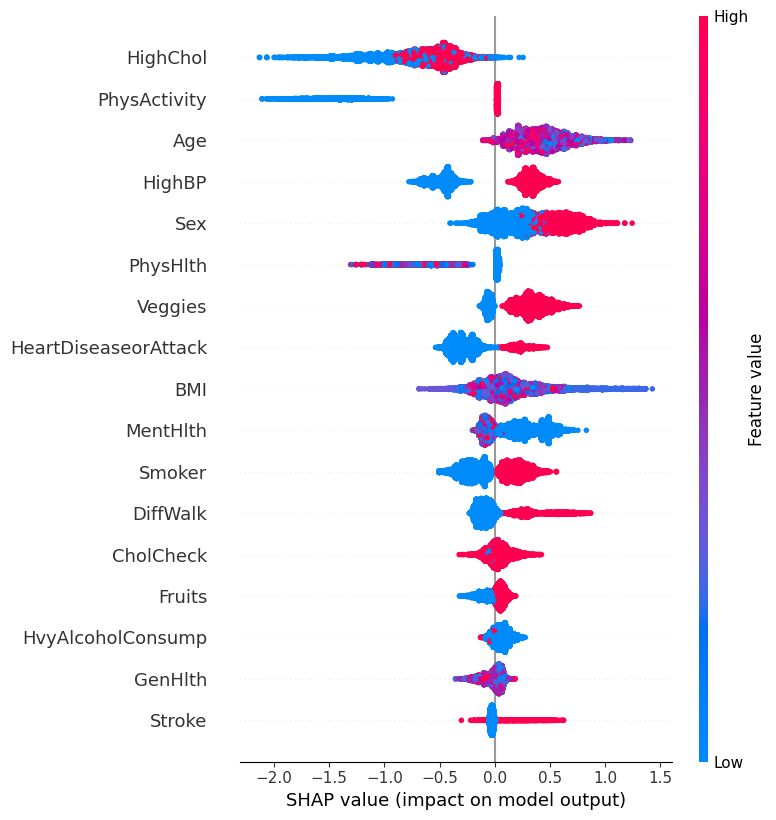

In [49]:
# Inserte código para generar gráficos de aporte global aquí
shap.summary_plot(shap_values, X_test)

La diferencia entre una interpretación general y un enfoque específico radica en que el gráfico SHAP resalta la importancia general de las variables para el modelo en su conjunto. Por otro lado, el análisis a nivel de instancia ofrece conclusiones detalladas sobre cómo una variable específica afecta una predicción concreta para un individuo en particular.

### 5.4 Scatter plot (0.4 puntos)


Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gráfico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¿Qué puede concluir de sus resultados?

In [ ]:
# Inserte código para generar gráficos de feature vs shap value aquí

### 5.5 Partial Dependence Plot (0.4 puntos)

Finalmente, se le pide generar un gráfico del tipo Partial Dependence Plot para las mismas 5 variables con mayor impacto global usando una submuestra de 1000 observaciones. ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

In [ ]:
# Inserte código para generar gráficos PDP aquí

## 6. Sistema de Reglas! (1.0 punto)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo. En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

In [ ]:
!pip install alibi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.2/524.2 kB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 67.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 85.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.2/313.2 kB 50.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.4/219.4 kB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 84.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 91.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 81.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 682.2/682.2 kB 65.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 82.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from alibi.explainers import AnchorTabular

2023-06-16 03:21:35.062920: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-16 03:21:35.266905: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-16 03:21:35.266966: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-06-16 03:21:35.308521: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-06-16 03:21:38.061257: W tensorflow/stream_executor/platform/de

In [ ]:
# Inserte su código para generar sistema de reglas aquí

idx = 1000
# explicar predicción idx 1000

idx = 3001
# explicar predicción idx 3001

idx = 5751
# explicar predicción idx 5751

# Retrospectiva... (1.0 puntos)

En base a los diferentes métodos que implementa y ha comentado en este laboratorio, comente qué métodos le permiten entregar mejores conclusiones para la tarea de clasificación de diabetes. Por otro lado, ¿qué métodos son más útiles para el problema del doctor Simi, métodos agnosticos locales o globales?

> Fundamente su Respuesta aquí

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://media.tenor.com/ctnq4bhZE3gAAAAC/drsimi-simi.gif)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>